# Code division multiple access (CDMA) Technique

CDMA is a spread spectrum multiple access technique widely used in mordern wireless communication, such as GPS's, mobile devices, BIOS etc.  A spread spectrum technique spreads the bandwidth of the data uniformly for the same transmitted power; it owns the advantages, lower EMI, trustful decryption, etc. In the middle of last century, spread spectrum technique did help American army to buid up the encrypted safety communication which confused enemy.

<div align="center">
<img src="images/Hedy_Lamarr.jpg">Hedy Lamarr</img>
</div>

Hedy Lammar is known as the most beautiful woman in European. However,  she is also a genius in Mahematics.   Lamarr and George Antheil submitted the idea of a secret communication system in June 1941; and it is the fundamental but important theory of communication techniques.

Other techniques include FDMA (Frequency), TDMA (Time).  

In [1]:
%matplotlib inline
from numpy import sin, pi
import random
import numpy as np

from matplotlib import rcParams
import matplotlib.pylab as plt
rcParams.update({'font.size': 12})

<h2>How to transfer multiple codes simulataneously</h2>

- orthorgonality: assume (vector) codes, $\vec a, \vec b$: they are called <b>orthogonal</b> with respect to each other:
    - $\vec a \cdot \vec a =||\vec a||^2, \vec b \cdot \vec b =||\vec b||^2, \vec a \cdot \vec b =0$
    - $\vec a \cdot (\vec a +\vec b)=||\vec a||^2$, $\vec b \cdot (\vec a +\vec b)=||\vec b||^2$

Physically, two orthogonal vectors are not infered with each other.

Haar Functions
---
$$
\mathbf{\psi}_0 (x) = \left\{ \begin{array}{ll}
     1 & 0 \leqslant x < 1 / 2\\
     - 1 & 1 / 2 < x \leqslant 1\\
     0 & \text{otherwise}
   \end{array} \right. 
$$
and other Haar functions are defined as follows:
- $\psi_{10}(x)=\psi_0(2x), \psi_{11}(x)=\psi_0(2x-1)$, 
- $\psi_{20}(x)=\psi_0(4x), \psi_{21}(x)=\psi_0(4x-1),\psi_{22}(x)=\psi_0(4x-2), \psi_{23}(x)=\psi_0(4x-3),\cdots$.

<b>Theorem</b>
Haar functions are orthogonal with each other since
$$\int_R \psi_i(x)\psi_j(x) d x=\delta(i,j)=\left\{\begin{matrix}
  0&\text{ if }i\ne j\\
  1&\text{ otherwise}
  \end{matrix}\right.
$$

How to benefit from numpy
---
Numpy optimizes computation via the array computing best that via traditional loop one.

<font color="lightblue">`np.vectorize()`</font> does the opimization for functions.

In [10]:
# for scalar function
def haar_fn(x):
    if x >= 0 and x<0.5:
        return 1
    elif x >= 0.5 and x<1:
        return -1
    else:
        return 0
# for vector-functions
haar_vec_fn=np.vectorize(haar_fn)    

In [2]:
x_start = -1
x_end = 1
x_N = 301
x_vec = np.linspace(x_start,x_end,x_N)

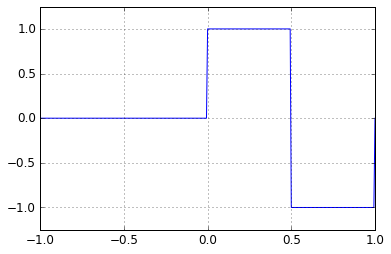

In [8]:
plt.plot(x_vec, haar_vec_fn(x_vec))
plt.ylim(-1.25, 1.25)

plt.xlim(x_start, x_end)
plt.grid()

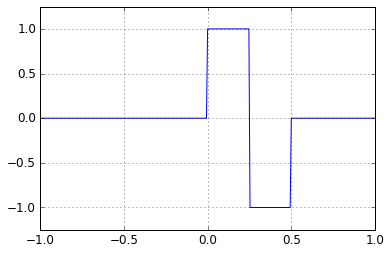

In [11]:
plt.plot(x_vec, haar_vec_fn(2*x_vec))
plt.ylim(-1.25, 1.25)
plt.xlim(x_start, x_end)
plt.grid()

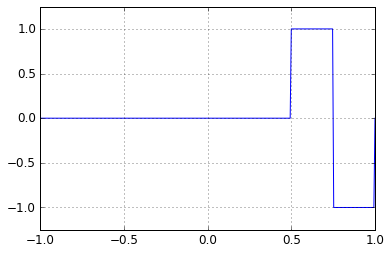

In [12]:
plt.plot(x_vec, haar_vec_fn(2*x_vec-1))
plt.ylim(-1.25, 1.25)
plt.xlim(x_start, x_end)
plt.grid()

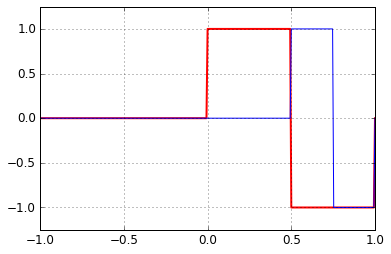

In [13]:
plt.plot(x_vec, haar_vec_fn(x_vec),lw=2,color='red')
plt.plot(x_vec, haar_vec_fn(2*x_vec-1))
#plt.plot(x_vec, haar_vec_fn(2*x_vec-1)*haar_vec_fn(x_vec),color='black')
plt.ylim(-1.25, 1.25)
plt.xlim(x_start, x_end)
plt.grid()

<h2>Exercise</h2>

Check all the Haar functions are orthogonal with each others.

<h2> Data transmition and encryption </h2>
- encoded by $(1,-1)\perp(1,1)$ (since $(1,-1)\cdot(1,1)=-1+1=0$):
<table> 
<tr>
<th>Step</th><th>	Encode sender0	</th><th>Encode sender1</th>
</tr>
<tr>
<td>0	</td><td>code0 = (1, –1), data0 = (1, 0, 1, 1)	</td>
<td>code1 = (1, 1), data1 = (0, 0, 1, 1)</td>
</tr>
<tr>
<td>1</td>
<td>encode0 = 2(1, 0, 1, 1) – (1, 1, 1, 1)= (1, –1, 1, 1)</td>
<td>encode1 = 2(0, 0, 1, 1) – (1, 1, 1, 1)= (–1, –1, 1, 1)</td>
</tr>
<tr>
<td>2	</td><td>signal0 = encode0 ⊗ code0<br>
 (1, –1, 1, 1) ⊗ (1, –1)
= (1, –1, –1, 1, 1, –1, 1, –1)
</td><td>signal1 = encode1 ⊗ code1<br>
 (–1, –1, 1, 1) ⊗ (1, 1)
= (–1, –1, –1, –1, 1, 1, 1, 1)</td>
</tr>
</table>
<br>
where (1, –1, 1, 1) ⊗ v = (v,-v v,v) and (–1, –1, 1, 1) ⊗ v = (-v,-v v,v) 
- Codes transmitted: (1, –1, –1, 1, 1, –1, 1, –1) + (–1, –1, –1, –1, 1, 1, 1, 1) = (0, –2, –2, 0, 2, 0, 2, 0)

- decoded
<table>
<tr>
<th>Step</th><th>	decode sender0	</th><th>decode sender1</th>
</tr>
<tr>
<td>0</td><td>code0 = (1, –1), signal = (0, –2, –2, 0, 2, 0, 2, 0)</td><td>code0 =(1, 1), signal = (0, –2, –2, 0, 2, 0, 2, 0)</td>
</tr>
<tr>
<td>1	</td><td>decode0 = pattern.vector0
        </td><td>decode1 = pattern.vector1</td>
</tr>
<tr>
<td>2	</td><td>decode0 = ((0, –2), (–2, 0), (2, 0), (2, 0)).(1, –1)
</td><td>decode1 = ((0, –2), (–2, 0), (2, 0), (2, 0)).(1, 1)</td>
</tr>
<tr>
<td>3	</td><td>decode0 = ((0 + 2), (–2 + 0), (2 + 0), (2 + 0))
        </td><td>decode1 = ((0 – 2), (–2 + 0), (2 + 0), (2 + 0))</td>
</tr>
<tr>
<td>4	</td><td>data0=(2, –2, 2, 2), meaning (1, 0, 1, 1)
        </td><td>data1=(–2, –2, 2, 2), meaning (0, 0, 1, 1)</td>
</tr>
</table>

# GPS Visualization

While following along with [PSAS's](http://psas.pdx.edu) GPS study group nights I really want to get a better visualization of what's going on with GPS signals as they're being created, sent, transformed, and variously mangled.

Let's start at the beginning.

## The GPS Carrier

The L1 GPS carrier is a plain sine wave at 1575.42 MHz. Not much to look at, but here it is

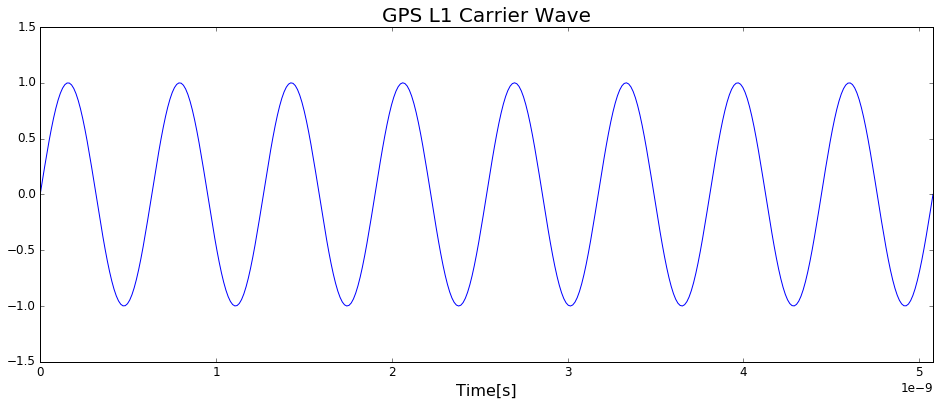

In [14]:
f = 154 * 10.23e6
t=np.linspace(0,8/f,400)

carrier = lambda t: sin(2*pi*f*t)
plt.figure(figsize=(16,6))
plt.plot(t,carrier(t))
plt.title('GPS L1 Carrier Wave',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time[s]',size='16')

# Data

Modulated to this carrier is a psudo-random sequnce known as a PRN. There isn't any information in this data in the usual way that we think of. That is to say that the bits themselves aren't interesting, it's just a random-looking number. But instead they work as a way to figure out where in the signal you are looking. It's part of a kind of radio technique called [CDMA](http://en.wikipedia.org/wiki/Code_division_multiple_access).

To have something to look at that is simpler than the actual GPS PRN we're going to make a psudorandom sequence using python's random module (a mersenne twister) starting with an arbitrary seed, in this case the string "GPS PRN". For later convineience we'll look at this sequence as a square wave from -1 to 1.

In [28]:
random.seed("GPS PRN")
prn_seq = [random.choice([1,-1]) for i in xrange(16)]

print("Our PRN chip:", str(prn_seq).replace('-1','0'))

('Our PRN chip:', '[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1]')


In [29]:
f_prn =  10.23e6 / 10
prn_seq[int(100*f_prn)%16]

-1

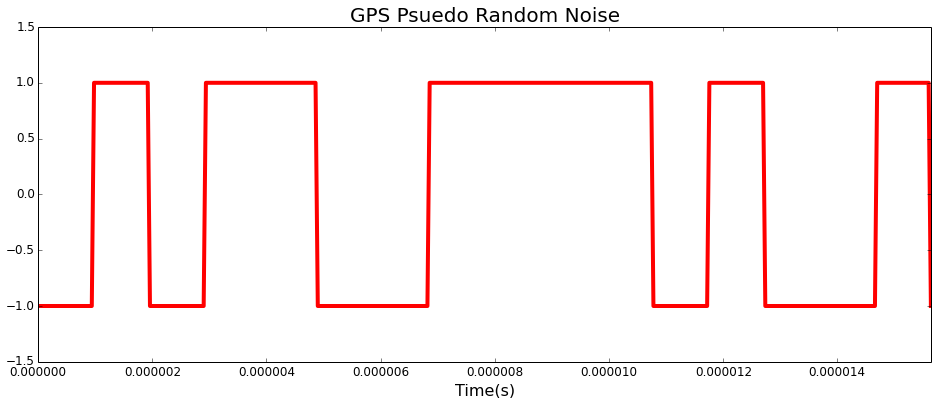

In [30]:
f_prn =  10.23e6 / 10
t=np.linspace(0,16/f_prn,400)

def prn_np(t):
    return [ prn_seq[int(ti*f_prn)%16] for ti in t]
plt.figure(figsize=(16,6))
plt.plot(t,prn_np(t), color='red',lw=4)
plt.title('GPS Psuedo Random Noise',size='20')
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time(s)',size='16')

In [11]:
np.size([ prn_seq[int(ti*f_prn)%16] for ti in t])

400

## Binary Phase Shift Keying (BPSK)

The transmited GPS signal uses [binary phase shift keying](http://en.wikipedia.org/wiki/Phase-shift_keying), signal changed by shift $\pi=180^\circ$ while it turns from 1 to -1, which can be done by multiplying the carefully constructed PRN above with the carrier!

This works because a $\sin(x)\times(-1) = \sin(x-180^\circ)$, in other words it's exactly a 180 degree phase shift. We should see this as blips in sine wave every time our data changes from 1 to 0 or _visa-versa_:

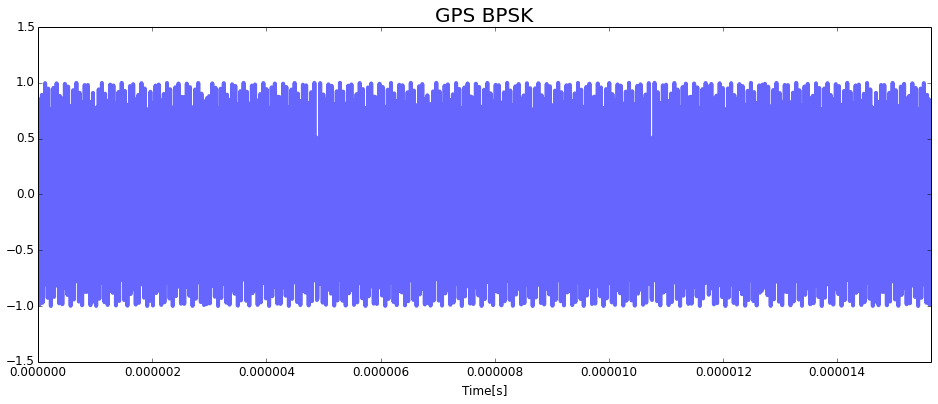

In [31]:
f = 154 * 10.23e6
f_prn =  10.23e6 /10

carrier = lambda t: sin(2*pi*f*t)
def prn_np(t):
    return [ prn_seq[int(ti*f_prn)%16] for ti in t]

#t=np.linspace(0,8/f_prn,400)
t=np.linspace(0,16/f_prn,1400)
signal = lambda t: carrier(t) * prn_np(t)
plt.figure(figsize=(16,6))
#plt.plot(t,prn_np(t),color='red',lw=4)
plt.plot(t,signal(t),lw=4,alpha=0.6)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time[s]',size=12)

Too hard to be decipherable! The problem is that the carrier is running three orders of magnintude faster than the PRN!!! Unless we zoom into one spot where the phase shift happens we can see anything at this scale.

For the sake of argument lets make the prn modulation much faster.

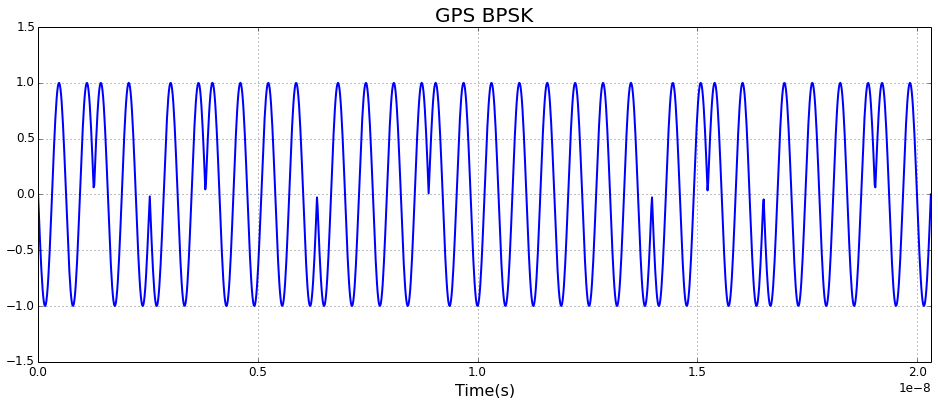

In [32]:
f_prn = 77 * 10.23e6 
t=np.linspace(0,16/f_prn,1400)
signal = lambda t: carrier(t) * prn_np(t)
plt.figure(figsize=(16,6))
plt.plot(t,signal(t),lw=2)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.grid()
plt.xlabel('Time(s)',size=16)

Now we see the phase shifts! To make what's going on even clearer, lets overlay the PRN back on the chart to see how the phase shifts coincide with the edges of our PRN:

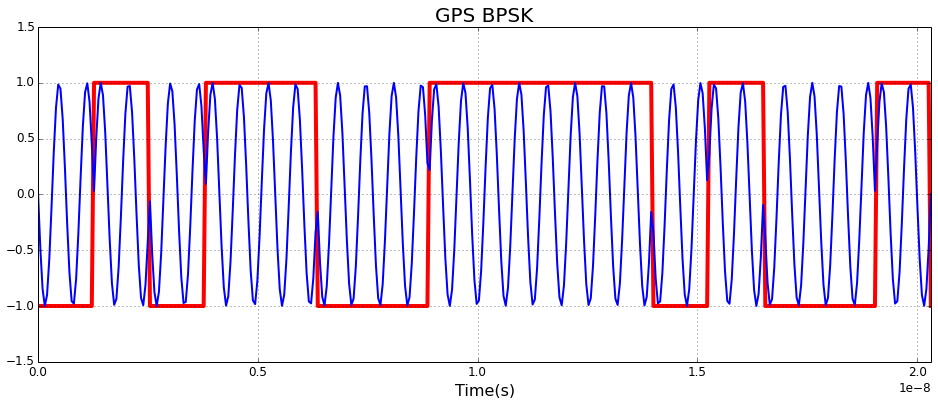

In [33]:
f_prn = 77 * 10.23e6 
t=np.linspace(0,16/f_prn,400)

def prn_np(t):
    return [ prn_seq[int(ti*f_prn)%16] for ti in t]
plt.figure(figsize=(16,6))
plt.plot(t,prn_np(t),color='red',lw=4)
plt.plot(t,signal(t),lw=2)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.grid()

plt.xlabel('Time(s)',size=16)

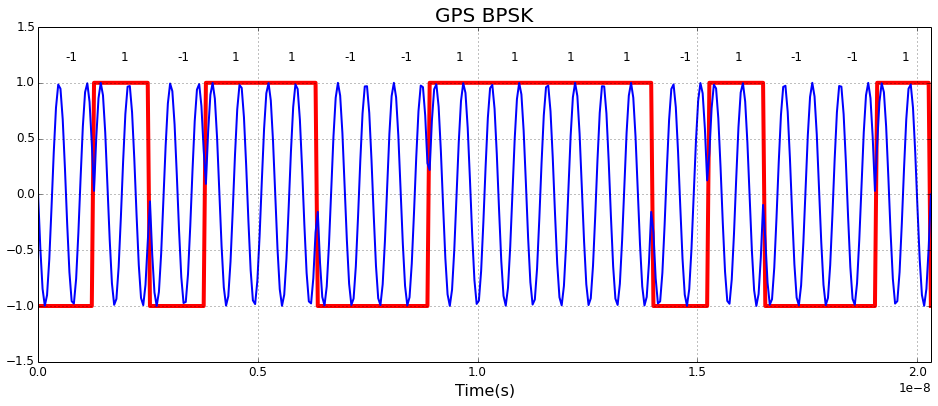

In [51]:
f_prn = 77 * 10.23e6 
t=np.linspace(0,16/f_prn,400)

def prn_np(t):
    return [ prn_seq[int(ti*f_prn)%16] for ti in t]
plt.figure(figsize=(16,6))
plt.plot(t,prn_np(t),color='red',lw=4)
plt.plot(t,signal(t),lw=2)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.grid()
#plt.text(0.15e-8,1.2,'-1,-1')
xt=t[-1]/16.
for i in np.arange(16):
    plt.text((i+1/2.)*xt,1.2,prn_seq[i])

plt.xlabel('Time(s)',size=16)

In [42]:
t[-1]/16.

1.2695027357783957e-09

<h2>Exercise</h2>

1. generate a sequence of codes with size 32 (PRN).
2. generate the PRN BPSK graph.
3. check the concideness between codes and graph. 

<h2>Exercise</h2>

1. generate a sequence of codes with size 32 (PRN).
2. generate the PRN BPSK graph.
3. check the concideness between codes and graph. 

In [61]:
prn_seq = [random.choice([1,-1]) for i in xrange(32)]
print(prn_seq)

[-1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1]


In [62]:
def prn_np(t):
    return [ prn_seq[int(ti*f_prn)%32] for ti in t]

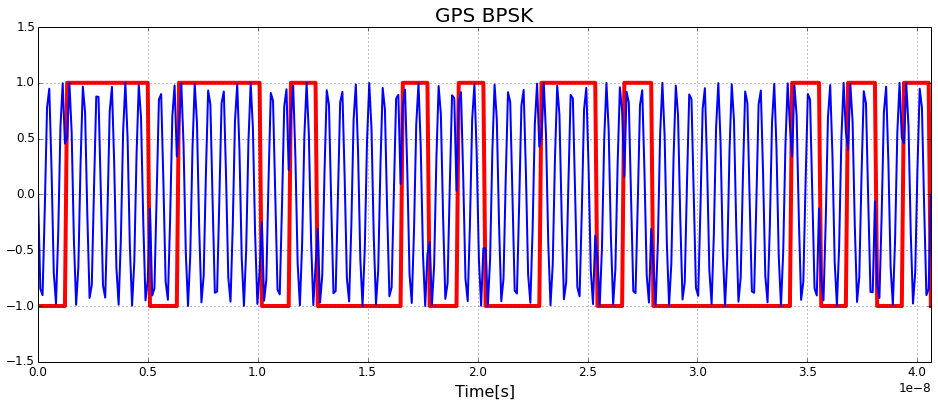

In [63]:
f_prn = 77 * 10.23e6 
t=np.linspace(0,32/f_prn,400)

plt.figure(figsize=(16,6))
plt.plot(t,prn_np(t),color='red',lw=4)
plt.plot(t,signal(t),lw=2)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.grid()


plt.xlabel('Time[s]',size=16)

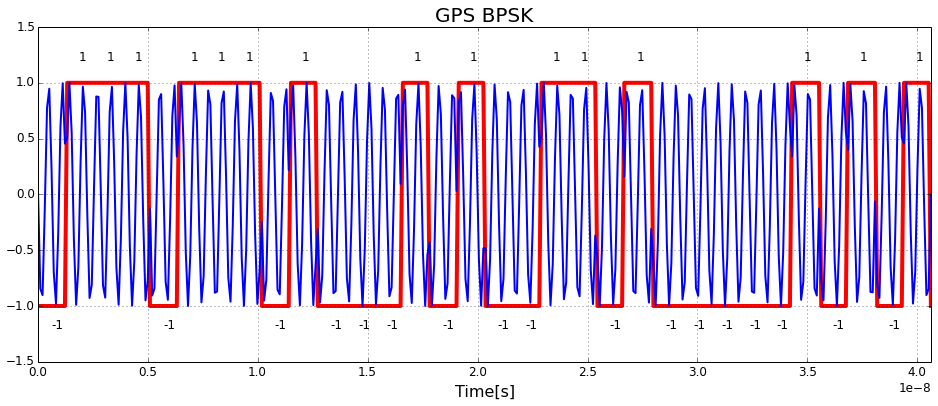

In [65]:
f_prn = 77 * 10.23e6 
t=np.linspace(0,32/f_prn,400)

plt.figure(figsize=(16,6))
plt.plot(t,prn_np(t),color='red',lw=4)
plt.plot(t,signal(t),lw=2)
plt.title('GPS BPSK',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.grid()
xt=t[-1]/32.
for i in np.arange(32):
    plt.text((i+1/2.)*xt,1.2*prn_seq[i],prn_seq[i])
plt.xlabel('Time[s]',size=16)

This is the basic encoding of a PRN in GPS. But the PRN is made wrong! This was just an example. Read the [next post](/blag/2014/gps-prn/) in the series to learn about how to compute the actual GPS PRN's.

In [2]:
!jupyter nbconvert CDMA-demo.ipynb

[NbConvertApp] Converting notebook CDMA-demo.ipynb to html
[NbConvertApp] Writing 851454 bytes to CDMA-demo.html
